In [1]:
from chemml.chem import Molecule

Using TensorFlow backend.
/opt/anaconda3/envs/my_chemml_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/my_chemml_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/my_chemml_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/my_

In [8]:
pip install openbabel

  Using cached openbabel-3.1.1.1.tar.gz (82 kB)
Failed to build openbabel
    Running setup.py install for openbabel ... error
    ERROR: Command errored out with exit status 1:
     command: /opt/anaconda3/envs/my_chemml_env/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/yt/tvtwgxl15hdfl1m9c3dvf9jc0000gn/T/pip-install-v2gm4v37/openbabel_8f316a01e8434c1ab5abeaf892373929/setup.py'"'"'; __file__='"'"'/private/var/folders/yt/tvtwgxl15hdfl1m9c3dvf9jc0000gn/T/pip-install-v2gm4v37/openbabel_8f316a01e8434c1ab5abeaf892373929/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/yt/tvtwgxl15hdfl1m9c3dvf9jc0000gn/T/pip-record-fbu09svx/install-record.txt --single-version-externally-managed --compile --install-headers /opt/anaconda3/envs/my_chemml_env/include/python3.6m/openbabel
         cwd: /pr

In [7]:
from openbabel import pybel

ImportError: cannot import name 'pybel'

In [4]:
xyz_name = 'IrCNNN1_s.xyz'
mol = Molecule('test1.xyz','xyz')
mol

AttributeError: module 'pybel' has no attribute 'readfile'

In [3]:
Ir_smiles = 'c1cc[c]2c(c1)-c1sc3ccccc3n1->[Ir+3]213(<-n2ccccc2-c2ccccn->12)<-n1c(sc2ccccc21)-c1cccc[c]13'
mol = Molecule(Ir_smiles, input_type='smiles')
mol

<chemml.chem.Molecule(
        rdkit_molecule : <rdkit.Chem.rdchem.Mol object at 0x154f067b0>,
        pybel_molecule : None,
        creator        : ('SMILES', 'c1cc[c]2c(c1)-c1sc3ccccc3n1->[Ir+3]213(<-n2ccccc2-c2ccccn->12)<-n1c(sc2ccccc21)-c1cccc[c]13'),
        smiles         : 'c1ccc2c(c1)-c1sc3ccccc3n1->[Ir+3]213(<-n2ccccc2-c2ccccn->12)<-n1c(sc2ccccc21)-c1ccccc13',
        smarts         : None,
        inchi          : None,
        xyz            : None)>

In [9]:
mol.hydrogens('add')
mol.to_xyz(optimizer='MMFF', mmffVariant='MMFF94s', maxIters=300) # 'UFF'

RDKit ERROR: [08:00:19] UFFTYPER: Unrecognized atom type: Ir6 (15)


ValueError: The MMFF parameters are not available for all of the molecule's atoms.

In [10]:
mol.to_xyz()

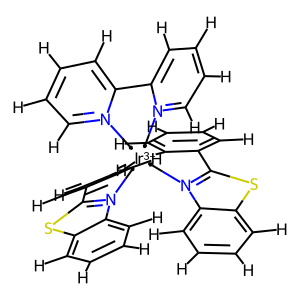

In [11]:
mol.visualize()

In [97]:
mol

<chemml.chem.Molecule(
        rdkit_molecule : <rdkit.Chem.rdchem.Mol object at 0x153f07710>,
        pybel_molecule : None,
        creator        : ('SMILES', 'Cc1ccc2n(->[Ir]34(<-n5cc(C)ccc5-c5cccc[c]53)(<-n3ccccc3-c3ccccn->43)[c]3ccccc3-2)c1'),
        smiles         : 'Cc1ccc2n(->[Ir]34(<-n5cc(C)ccc5-c5ccccc53)(<-n3ccccc3-c3ccccn->43)c3ccccc3-2)c1',
        smarts         : None,
        inchi          : None,
        xyz            : <XYZ(geometry: (67, 3), atomic_numbers: (67, 1), atomic_symbols: (67, 1))>)>

In [4]:
os.chdir('ref_complex_xyz')

In [119]:
tot_num = len(mol.xyz.atomic_symbols)
with open('test_IrCNNN.xyz','w') as f:
    f.write('{}\n'.format(tot_num))
    f.write('IrCNNN\n')
    for i in range(tot_num):
        f.write('{}  {} {} {}\n'.format(mol.xyz.atomic_symbols[i][0], mol.xyz.geometry[i][0], mol.xyz.geometry[i][1], mol.xyz.geometry[i][2]))


## convert smiles to xyz

In [2]:
def smiles2xyz(Ir_smiles, xyz_name):
    mol = Molecule(Ir_smiles, input_type='smiles')
    mol.hydrogens('add')
    while True:
        try:
            mol.to_xyz(optimizer='MMFF', mmffVariant='MMFF94s', maxIters=300) # 'UFF'
        except:
            print("{} MMFF Error".format(xyz_name))
        try:    
            mol.to_xyz()
            break
        except:
            print("{} to_xyz Error".format(xyz_name))
        
    tot_num = len(mol.xyz.atomic_symbols)
    with open(xyz_name,'w') as f:
        f.write('{}\n'.format(tot_num))
        f.write('IrCNNN\n')
        for i in range(tot_num):
            f.write('{}  {} {} {}\n'.format(mol.xyz.atomic_symbols[i][0], mol.xyz.geometry[i][0], mol.xyz.geometry[i][1], mol.xyz.geometry[i][2]))
            
    return 1


In [3]:
import pandas as pd
import os, sys

cwd = os.getcwd()
df = pd.read_csv(cwd+'/ref_smiles.csv')
df

,Unnamed: 0,complex_i,CN_smiles,NN_smiles,complex_smiles
0,0,1,FC1=CC(F)=C(C2=[15N]C=C(C(F)(F)F)C=C2)[13C]=C1,CC(C)(C)C1=CC=[15N]C(C2=[15N]C=CC(C(C)(C)C)=C2...,CC(C)(C)c1ccn2->[Ir+3]34(<-n5cc(C(F)(F)F)ccc5-...
1,1,2,FC1=CC(F)=C(C2=[15N]C=CC(C(C)(C)C)=C2)[13C]=C1,CC(C)(C)C1=CC=[15N]C(C2=[15N]C=CC(C(C)(C)C)=C2...,CC(C)(C)c1ccn2->[Ir+3]34(<-n5ccc(C(C)(C)C)cc5-...
2,2,3,FC1=CC(F)=C(C2=[15N]C=CC=C2)[13C]=C1,CC(C)(C)C1=CC=[15N]C(C2=[15N]C=CC(C(C)(C)C)=C2...,CC(C)(C)c1ccn2->[Ir+3]34(<-n5ccccc5-c5c(F)cc(F...
3,3,4,C1(C2=[15N]C=CC=C2)=CC=CC=[13C]1,CC(C)(C)C1=CC=[15N]C(C2=[15N]C=CC(C(C)(C)C)=C2...,CC(C)(C)c1ccn2->[Ir+3]34(<-n5ccccc5-c5cccc[c]5...
4,4,5,C1(C2=[15N]C=CC=C2)=CC=CC=[13C]1,COC1=CC=[15N]C(C2=[15N]C=CC(OC)=C2)=C1,COc1ccn2->[Ir+3]34(<-n5ccccc5-c5cccc[c]53)(<-n...
5,5,6,CC(C)(C)C1=CC=[13C]C(C2=[15N]C=CC(C(C)(C)C)=C2...,CC(C)(C)C1=CC=[15N]C(C2=[15N]C=CC(C(C)(C)C)=C2...,CC(C)(C)c1cc[c]2c(c1)-c1cc(C(C)(C)C)ccn1->[Ir+...
6,6,7,CC(C)(C)C1=CC=[13C]C(C2=[15N]C=CC(C(C)(C)C)=C2...,COC1=CC=[15N]C(C2=[15N]C=CC(OC)=C2)=C1,COc1ccn2->[Ir+3]34(<-n5ccc(C(C)(C)C)cc5-c5cc(C...


In [5]:
for i in range(len(df)):
    Ir_smiles = df['complex_smiles'][i]
    xyz_name = 'ref'+str(i)+'.xyz'
    status = smiles2xyz(Ir_smiles, xyz_name)
    print(status)

RDKit ERROR: [08:31:07] UFFTYPER: Unrecognized atom type: Ir6 (8)


ref0.xyz MMFF Error
ref0.xyz to_xyz Error


RDKit ERROR: [08:33:09] UFFTYPER: Unrecognized atom type: Ir6 (8)


ref0.xyz MMFF Error
1


RDKit ERROR: [08:33:28] UFFTYPER: Unrecognized atom type: Ir6 (8)


ref1.xyz MMFF Error
ref1.xyz to_xyz Error


RDKit ERROR: [08:35:38] UFFTYPER: Unrecognized atom type: Ir6 (8)


ref1.xyz MMFF Error
1


RDKit ERROR: [08:35:48] UFFTYPER: Unrecognized atom type: Ir6 (8)


ref2.xyz MMFF Error
1


RDKit ERROR: [08:36:33] UFFTYPER: Unrecognized atom type: Ir6 (8)


ref3.xyz MMFF Error
1


RDKit ERROR: [08:36:56] UFFTYPER: Unrecognized atom type: Ir6 (6)


ref4.xyz MMFF Error
1


RDKit ERROR: [08:37:04] UFFTYPER: Unrecognized atom type: Ir6 (20)


ref5.xyz MMFF Error
ref5.xyz to_xyz Error


RDKit ERROR: [08:37:51] UFFTYPER: Unrecognized atom type: Ir6 (20)


ref5.xyz MMFF Error
ref5.xyz to_xyz Error


RDKit ERROR: [08:38:33] UFFTYPER: Unrecognized atom type: Ir6 (20)


ref5.xyz MMFF Error
1


RDKit ERROR: [08:38:53] UFFTYPER: Unrecognized atom type: Ir6 (6)


ref6.xyz MMFF Error
1
